    # Installation

**Step 0.1 (Google Colab): Make sure to switch to a runtime with GPU-support**

In the menu bar --> Runtime --> Change runtime type --> GPU

**Step 0.2 (Google Colab): Mount Google Drive for faster data transfer**

In the bar on the left (Files), third icon from the left

**Step 1: Clone the repository**  for Collab


!mkdir ergomaps
%cd ergomaps

!cp -R /content/drive/MyDrive/Work/Demos/ErgoMaps/ErgoMaps_Tutorial/. /content/ergomaps


**Step 2: Install the libraries**for Collab

!pip install fvcore omegaconf fairscale timm filterpy tk

import os

!git clone https: // github.com/facebookresearch/detectron2 detectron
!mkdir detectron/checkpoint
os.chdir('/content/ergomaps/detectron/checkpoint')
!wget https: // dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/ 138363331 /model_final_997cc7.pkl
os.chdir('../..')

!git clone https: // github.com/facebookresearch/VideoPose3D
!mkdir VideoPose3D/checkpoint
os.chdir('/content/ergomaps/VideoPose3D/checkpoint')
!wget https: // dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
!wget https: // dl.fbaipublicfiles.com/video-pose-3d/pretrained_humaneva15_detectron.bin
os.chdir('../..')

# Running an ergonomic analysis


**Step 1: Setting up the environment and loading the models**

!pip install opencv-python cloudpickle pycocotools plotly

In [3]:
from utils import *

Setup_environment()

from hpe_wrapper import Wrapper_2Dpose, Wrapper_3Dpose

config = load_config()
model_2D ='./detectron/configs/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml'
weights_2D = './detectron/checkpoint/model_final_997cc7.pkl'
model_3D = './VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin'
print(config['video_object'])

pose2d = Wrapper_2Dpose(model=model_2D, weights= weights_2D , ROI_thr=0.75)
pose_3d = Wrapper_3Dpose(model_3D)

./data/videos/working overhead.mp4


In [4]:
#video_object = Video_wrapper('./C1.mp4', resize_video_by=0.5, start=0, end=10) # downsample_fps_by=2,
video_object = Video_wrapper(config['video_object'], resize_video_by=0.3) #, start=0, end=10) # downsample_fps_by=2,

**Step 3: Extract postural information**

In [5]:
data_2d, metadata_vid = pose2d.predict_2D_poses(input_video_object=video_object)
data_3d = pose_3d.predict_3D_poses(data_2d, metadata_vid)

Frame 0 processed in 0.954s
Frame 1 processed in 0.086s
Frame 2 processed in 0.135s
Frame 3 processed in 0.081s
Frame 4 processed in 0.083s
Frame 5 processed in 0.085s
Frame 6 processed in 0.086s
Frame 7 processed in 0.086s
Frame 8 processed in 0.096s
Frame 9 processed in 0.097s
Frame 10 processed in 0.092s
Frame 11 processed in 0.094s
Frame 12 processed in 0.093s
Frame 13 processed in 0.089s
Frame 14 processed in 0.083s
Frame 15 processed in 0.088s
Frame 16 processed in 0.080s
Frame 17 processed in 0.084s
Frame 18 processed in 0.079s
Frame 19 processed in 0.084s
Frame 20 processed in 0.081s
Frame 21 processed in 0.086s
Frame 22 processed in 0.089s
Frame 23 processed in 0.086s
Frame 24 processed in 0.085s
Frame 25 processed in 0.091s
Frame 26 processed in 0.084s
Frame 27 processed in 0.078s
Frame 28 processed in 0.084s
Frame 29 processed in 0.091s
Frame 30 processed in 0.093s
Frame 31 processed in 0.085s
Frame 32 processed in 0.090s
Frame 33 processed in 0.087s
Frame 34 processed in 0.

In [6]:
from ergonomics import RULA

rula_eval = RULA(data_3d)
scores = rula_eval.compute_scores()

Angles: [[121.12080796643733, 128.16206573709113, 119.97313709573314, 125.56969475836947, 71.37175619476842, 72.97353117778479, 17.801872194684734, 13.478662978390162, 17.01260090883659, 6.772104387537317, 90.19167810315624, 5.472062394114687, 85.71286351719041, 83.82218519266084], [120.9855905771422, 128.4193589631255, 120.56965456280543, 124.93820278846677, 71.55366462293338, 71.93874385814952, 17.784714759489674, 13.379843801478415, 17.029762098244447, 6.443664069126675, 90.21272191598905, 5.972860334090029, 84.72606510666365, 82.30414832886883], [120.89219342226505, 128.7514427605715, 121.11485470523195, 124.6387672952534, 72.1233570412258, 69.9755562453911, 18.013375832523366, 13.516871056607187, 16.946749644485664, 6.517583364532315, 90.11084964451831, 6.246183543429254, 84.4817697306198, 81.62330141202362], [121.58502839993974, 128.4998732330616, 121.46571821521653, 124.78922270229044, 71.9785638610107, 68.77621600827189, 18.058673647098885, 13.540230303568649, 16.90101200285408

In [7]:
len(scores)

153

### 2d viz

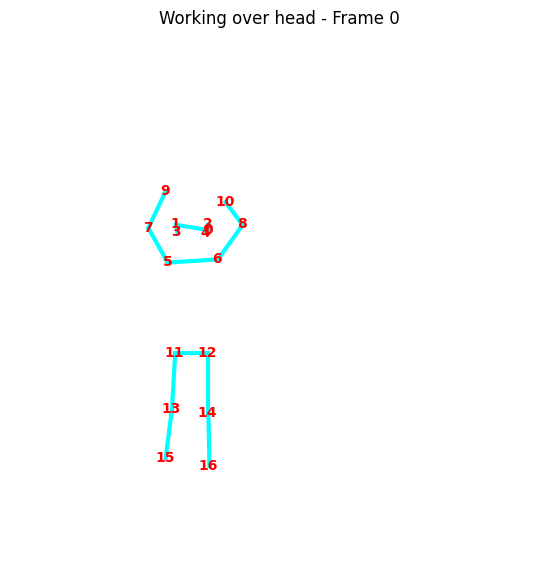

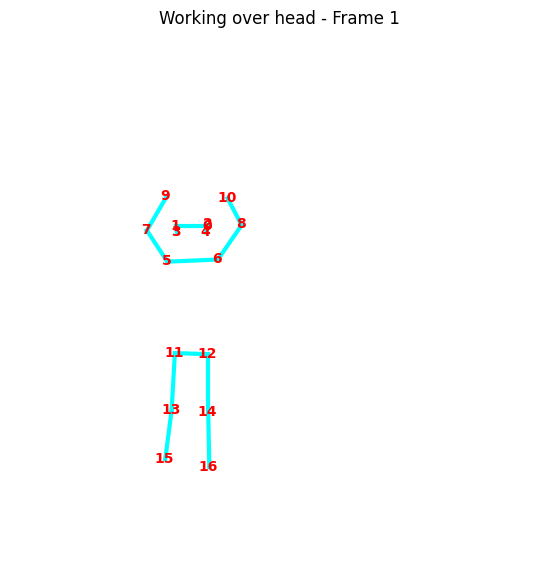

In [17]:
import matplotlib.pyplot as plt

def visualize_keypoints(matrix):
    # Number of frames
    num_frames = matrix.shape[0]

    # Keypoint pairs to connect
    pairs = [(0,1), (0,2), (1,3), (2,4), (5,6), (5,7), (6,8), (7,9), (8,10), (11,12), (11,13), (12,14), (13,15), (14,16)]
    for frame in range(2):
        #for frame in range(num_frames):
        # Create a black background with a larger frame size
        plt.figure(figsize=(7, 7))
        plt.imshow(np.ones((1000, 1000, 3)))  # Increased frame size to 1000x1000 for visualization

        for idx, keypoint in enumerate(matrix[frame]):
            x, y, score = keypoint
            # Convert x, y to integers
            x, y = int(x), int(y)

            # Adjust x and y for the larger frame size
            x *= 2
            y *= 2

            # Plot the keypoint number on the frame
            plt.text(x, y, str(idx), color='red', ha='center', va='center', fontsize=10, weight='bold')

        # Connect the keypoints based on the pairs
        for pair in pairs:
            x1, y1, _ = matrix[frame][pair[0]]
            x2, y2, _ = matrix[frame][pair[1]]

            # Adjust for the larger frame size
            x1, y1, x2, y2 = x1*2, y1*2, x2*2, y2*2

            plt.plot([x1, x2], [y1, y2], color='cyan', linewidth=3)

        plt.title(f"Working over head - Frame {frame}")
        plt.axis('off')
        plt.show()


visualize_keypoints(data_2d['keypoints']['data_2d']['custom'])

### 3D viz in HTML


In [8]:
import plotly.graph_objects as go
import webbrowser
import time

def visualize_frame(frame):
    # Extract x, y, z coordinates of keypoints
    x = frame[:, 0]
    y = frame[:, 2]
    z = - frame[:, 1]

    # Create a scatter plot for the keypoints
    scatter = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(size=5, color='red')
    )

    # Define pairs of keypoints to connect with green lines
    pairs = [(0,1), (0,4), (0,7), (7,8), (8,9), (9,10), (4,5), (1,2), (5,6), (2,3),
             (8,11), (8,14), (11,12), (14,15), (12,13), (15,16)]

    lines = []
    for pair in pairs:
        lines.append(
            go.Scatter3d(
                x=[x[pair[0]], x[pair[1]]],
                y=[y[pair[0]], y[pair[1]]],
                z=[z[pair[0]], z[pair[1]]],
                mode='lines',
                line=dict(color='green', width=5)
            )
        )

    # Create the layout and add all traces
    layout = go.Layout(
        scene=dict(
            xaxis=dict(nticks=10, range=[min(x), max(x)]),
            yaxis=dict(nticks=10, range=[min(y), max(y)]),
            zaxis=dict(nticks=10, range=[min(z), max(z)])
        )
    )

    fig = go.Figure(data=[scatter] + lines, layout=layout)

    # Save the plot as an HTML file
    filename = "plot.html"
    fig.write_html(filename)

    # Open the saved HTML file in the default web browser
    webbrowser.open(filename)
    time.sleep(3)

# Example usage
# Assuming data_3d is your 3D array of shape (199, 17, 3)
for frame in data_3d[22:30,:,:]:
    visualize_frame(frame)

**Step 5: Visualise movement map**


In [ ]:
from heatmaps import heatmap_generator

viz = heatmap_generator(video_object=video_object, background_style='median')
viz.print_keypoints()

viz.movement_heatmap(data_2d,'Mid')
#viz.ergonomic_heatmap(data_2d, 'Mid', scores, min_score=3)

In [ ]:
angles = rula_eval.accumulate_angles()
rula_eval.plot_angles(angles, 0)

Experimental: Analyse the percentage of the movement above a specific angle threshold

In [ ]:
from numpy import single

angle_threshold = 100

full_vid_len = len(angles)
counter = 0

for single_posture_angle in np.asarray(angles)[:,-6]: #left shoulder z
    #print(single_posture_angle)
    if single_posture_angle > angle_threshold:
        counter += 1

print("The percentage of angles above threshold in video is: " + str((counter/full_vid_len)*100))

In [ ]:
for i in range(len(angles[0])-1):
    rula_eval.plot_angles(angles, i)